In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
#%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observations from the table.
Credit Card, Online, CD Account, Securities Account, PErsonal Loan - are all a Yes/No fields. 9.6% (480) accepeted personal loan in the last campaign. - Verify whether the number matches.
Education, Family - Can be used as categories?
Need to remove zip code, ID - Will probably not add any value.

Experience - There seems to be some negative values. Need to remove it and replace it with mean. 

In [4]:
data = data.drop(['ID', 'ZIP Code'], axis=1)

In [5]:
data.isnull().sum() ### No null variables

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### No null variables

In [6]:
data[data.Experience < 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0
Securities Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0
CD Account,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


### There are 52 entries where experience is negative.
Need to replace it by mean. The mean needs to be calculated only for the non negative values


### The ones with negative experience 
The negative experience isnt valid. We have two choices.
1. Either drop these entries.
2. Change it with mean value.

On further study those that fall in this category have decent salaries. So we cannot drop these entries. 
The negative experience seems to be a typo or data error. Need to replace it with mean

#### none in this set have taken a loan

In [7]:
data[data.Experience < 0].Experience = data[data.Experience >= 0].Experience.mean()
#data.Experience.mean()
data.describe().transpose()

/Users/anandram.b/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [8]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Replaced the negative values with mean.

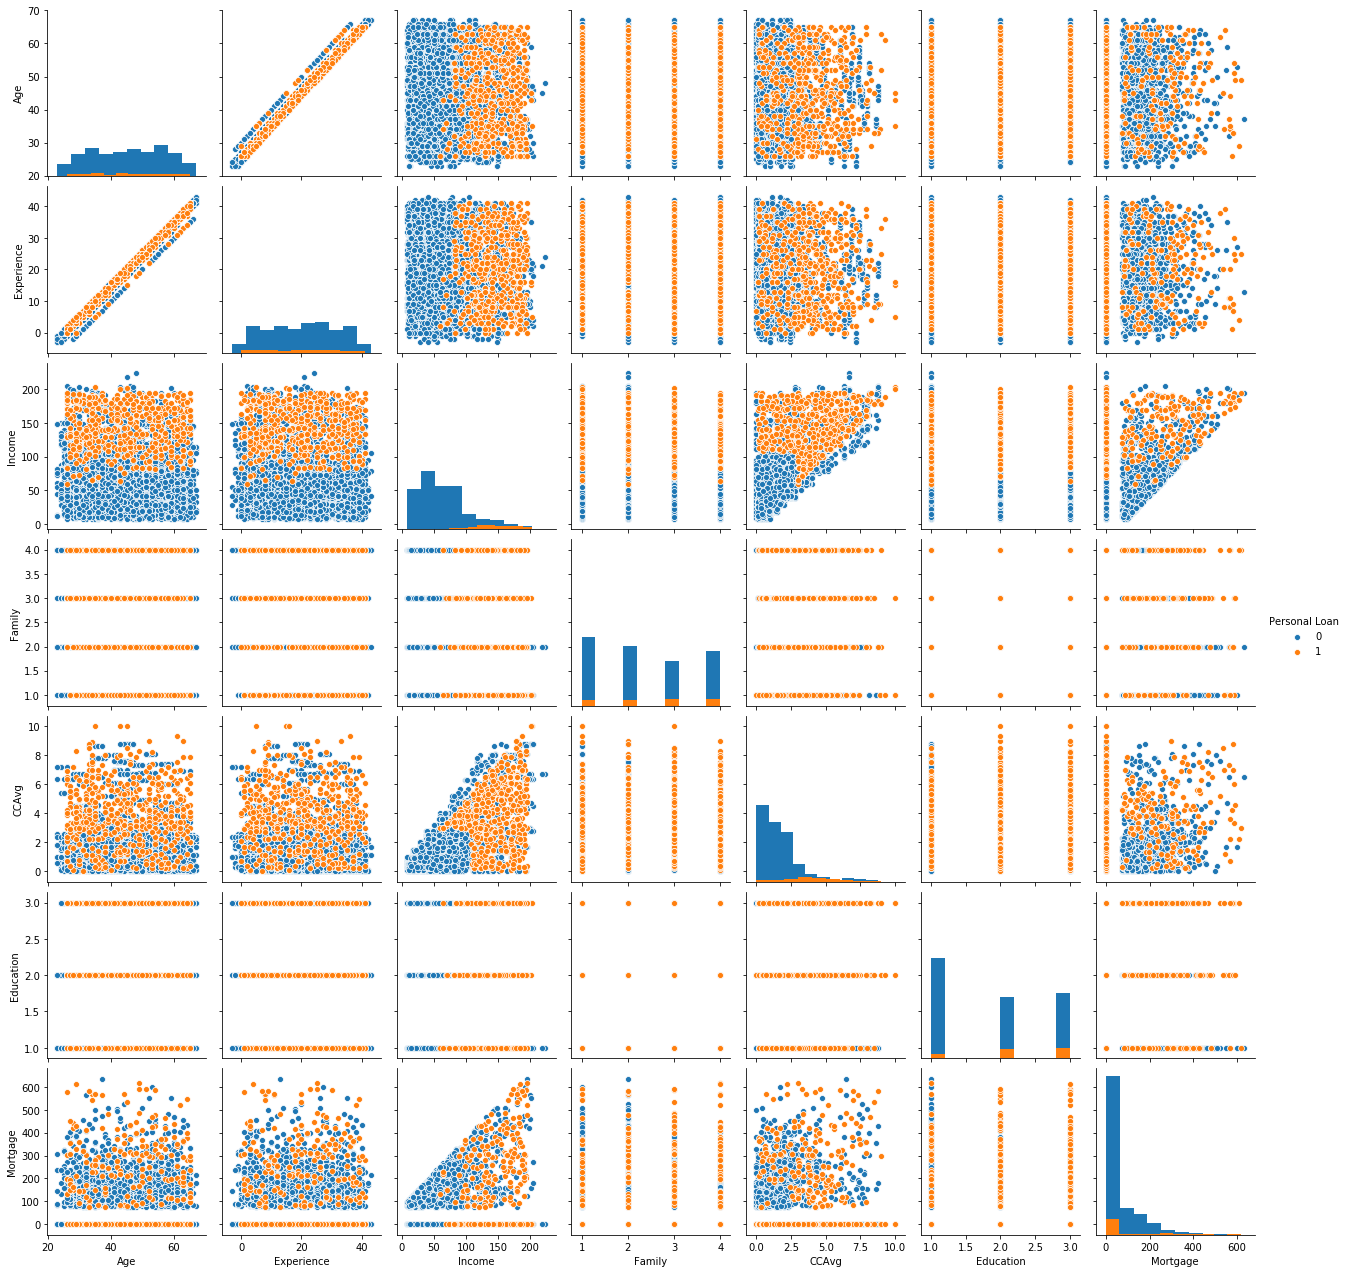

In [9]:
%matplotlib inline
sns.pairplot(data.iloc[:,:-4], hue='Personal Loan', diag_kind='hist')
    ##data.drop(['Personal Loan'], axis=1), hue=data['Personal Loan'])

## Understanding
1. Personal Loan is typically taken by the group with higher income bracket - This also seems to coorelate to higher experience.
2. Should we eliminate one of income, experience. seems to coorelate?
3. High Income group with higher CC spend seems to be strong contenders for Personal loan.
4. Max mortgage increases with income. Maybe one of them can be eliminated.


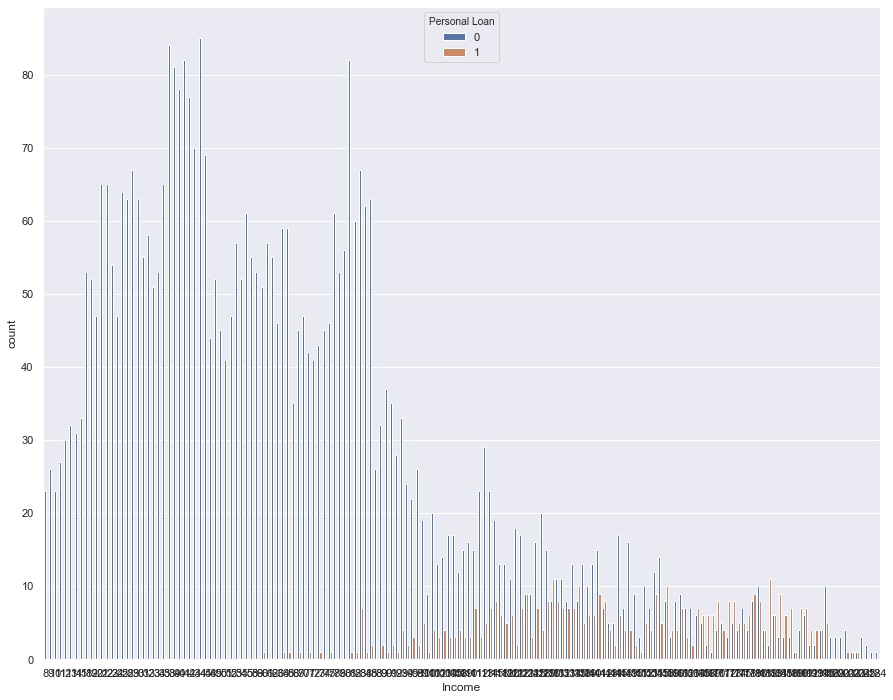

In [97]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})
sns.countplot(data.Income, hue=data['Personal Loan'])

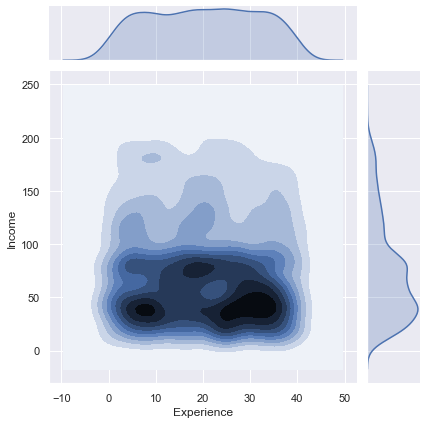

In [92]:
sns.jointplot(data.Experience, data.Income, kind='kde')

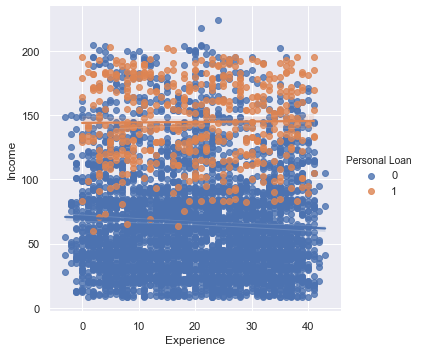

In [91]:
sns.lmplot(x='Experience', y='Income', data=data, hue='Personal Loan')

In [13]:
#sns.lmplot(x='Mortgage', y='Income', data=data, hue='Personal Loan')
z_mort_pl = data[(data.Mortgage == 0) & (data['Personal Loan'] == 1)].count()/data[(data.Mortgage == 0)].count()
nz_mort_pl = data[(data.Mortgage != 0) & (data['Personal Loan'] == 1)].count()/data[(data.Mortgage != 0)].count()
print(z_mort_pl)

Age                   0.090121
Experience            0.090121
Income                0.090121
Family                0.090121
CCAvg                 0.090121
Education             0.090121
Mortgage              0.090121
Personal Loan         0.090121
Securities Account    0.090121
CD Account            0.090121
Online                0.090121
CreditCard            0.090121
dtype: float64


In [14]:
print(nz_mort_pl)

Age                   0.109233
Experience            0.109233
Income                0.109233
Family                0.109233
CCAvg                 0.109233
Education             0.109233
Mortgage              0.109233
Personal Loan         0.109233
Securities Account    0.109233
CD Account            0.109233
Online                0.109233
CreditCard            0.109233
dtype: float64


#### It seems people taking mortgage are more likely to take Personal Loan. Although Correlation seems ot be low.

In [15]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


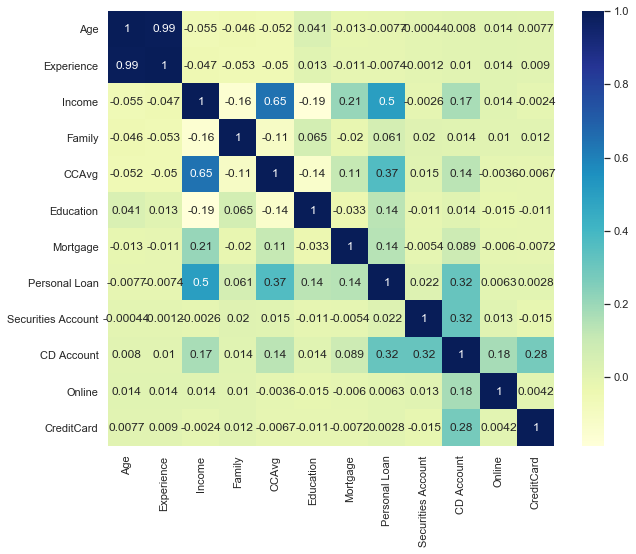

In [72]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')


## Coorelation readings.
- Very coorelation be`tween Age and Experience. One of them can be deleted.
- Good coorelation between Avg CC spend vs Income.
- Good Coorelation between Income and Personal Loan. 
- Good Coorelation between Avg CC Spend and Personal Loan
- Those with CD account are likely to take a personal loan.

- No significant coorelation between Education and Income.
- No significant coorelation between Experience and Income. Thats surprising.




# the Best params for preduction, in order of strength of indication, seems to be
##### a. Income
##### b. CC Spend
##### c. Having a CD Account
##### d. Very light correlation with Education and Mortgage.



In [157]:
X = data[['Income', 'CCAvg', 'Education']]
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=data['Personal Loan'], random_state=8)
##print("Train % of PL", X_train[X_train['Personal Loan'] == 0].count())
### Stratify based on 'Personal Loan' to ensure the distribution is good between Train and test

## Logistic Regression ##

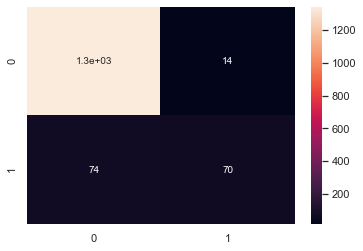

In [158]:
%matplotlib inline
LGR = LogisticRegression(solver="liblinear")
LGR.fit(X_train, y_train)
y_predict=LGR.predict(X_test)
LG_cm = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(LG_cm, annot=True)

In [159]:
print("The train Model score is ", LGR.score(X_train, y_train))
print("The test Model score is ", LGR.score(X_test, y_test))

The train Model score is  0.9371428571428572
The test Model score is  0.9413333333333334


In [160]:
print("False Negative - i.e. people who were identified as 'will take loan' but didn't: ", LG_cm[1][0])
print("True Negative - i.e. people who were identified as 'will take loan' and did take loan: ", LG_cm[1][1])
print("Accuracy of prediction i.e. what % of 'will take loan' actually took loan? : ", LG_cm[1][1]/(LG_cm[1][1]+LG_cm[1][0]))

False Negative - i.e. people who were identified as 'will take loan' but didn't:  74
True Negative - i.e. people who were identified as 'will take loan' and did take loan:  70
Accuracy of prediction i.e. what % of 'will take loan' actually took loan? :  0.4861111111111111


# KNN Model #

In [161]:
from sklearn.neighbors import KNeighborsClassifier

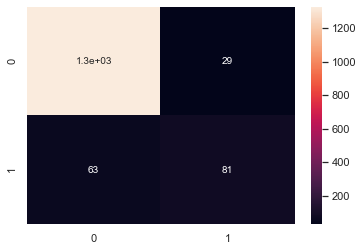

In [162]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn_predict = knn.predict(X_test)
knn_cm = metrics.confusion_matrix(y_test, y_knn_predict)
sns.heatmap(knn_cm, annot=True)

In [163]:
print("The train KNN Model score is ", knn.score(X_train, y_train))
print("The test KNN Model score is ", knn.score(X_test, y_test))

The train KNN Model score is  0.9588571428571429
The test KNN Model score is  0.9386666666666666


In [164]:
print("False Negative - i.e. people who were identified as 'will take loan' but didn't: ", knn_cm[1][0])
print("True Negative - i.e. people who were identified as 'will take loan' and did take loan: ", knn_cm[1][1])
print("Accuracy of prediction i.e. what % of 'will take loan' actually took loan? : ", knn_cm[1][1]/(knn_cm[1][1]+knn_cm[1][0]))

False Negative - i.e. people who were identified as 'will take loan' but didn't:  63
True Negative - i.e. people who were identified as 'will take loan' and did take loan:  81
Accuracy of prediction i.e. what % of 'will take loan' actually took loan? :  0.5625


# Naive Bayes #

In [165]:
from sklearn.naive_bayes import GaussianNB

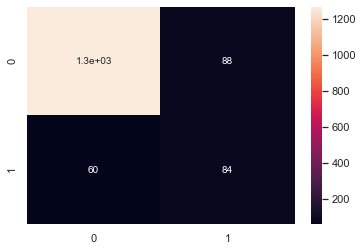

In [166]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb_predict = nb.predict(X_test)
nb_cm = metrics.confusion_matrix(y_test, y_nb_predict)
sns.heatmap(nb_cm, annot=True)

In [167]:
print("The accurancy score of Train Naive Bayes is", nb.score(X_train, y_train))
print("The accurancy score of Test Naive Bayes is", nb.score(X_test, y_test))
#print(metrics.accuracy_score(y_test, y_nb_predict))
#printmetrics.accuracy_score(y_test, y_nb_predict))

The accurancy score of Train Naive Bayes is 0.9094285714285715
The accurancy score of Test Naive Bayes is 0.9013333333333333


In [168]:
print("False Negative - i.e. people who were identified as 'will take loan' but didn't: ", nb_cm[1][0])
print("True Negative - i.e. people who were identified as 'will take loan' and did take loan: ", nb_cm[1][1])
print("Accuracy of prediction i.e. what % of 'will take loan' actually took loan? : ", nb_cm[1][1]/(nb_cm[1][1]+nb_cm[1][0]))

False Negative - i.e. people who were identified as 'will take loan' but didn't:  60
True Negative - i.e. people who were identified as 'will take loan' and did take loan:  84
Accuracy of prediction i.e. what % of 'will take loan' actually took loan? :  0.5833333333333334


# Results #
We tried 3 models. Here are the sklearn metric module accuracy score for each model
1. Logistic regression - 94.53%
2. K Nearest Neighbour - 93.8%
3. Naive Bayes - 87.4%

## How to read results? ##
We care about Personal Loan being a 1 i.e. people who were predicted to take loan and who actually took loan. The accuracy score in the sklearn metrics isnt very useful in this case. It will always give a high accuracy score; and gives fake confidence.

As business this what to look for
   a. Maximize the number of people who took a loan as a % of total search space.
   a. Widest net of possible search
We need Most accurancy in the search field i.e. How many of the onces which are marked as '1' actually end up taking a loan. 
   We need to maximize thie number For this we calculate by comparing the percentage TN to TN + FN
   i.e. TN/(TN+FN)
   
   
   

## Why did I choose the features as I did? ##
I experimented with combination of 
1. Income
2. CCAvg
3. Education
4. Mortgage
5. CD Account. 

I ended up choosing Income, CCAVg and Education because Mortgage and CD Account made marginal increase +0.5% in accuracy. How the accuracy metric we defined has an adverse impact.

## What model will i recommend ##
The results of the metric we defined (TN as % of TN+FN) 
1. Logistic regression - 48.61% (70 of 144 would actually take loan)
2. K Nearest Neighbour - 56.25% (81 of 144 would actually take the loan)
3. Naive Bayes - 58.33% (84 of 144 would actually take the loan)


If we look purely from the sklearn accuracy score logistic regression or KNN seems to be the best choice. However based on the metric we defined((TN as % of TN+FN) KNN or Naive Bayes seem to be the best choice.

I would go for KNN or Naive bayes. KNN while a more complicated model gave me more consistent results between these 3. 
If i want so simplify the model+features, i would go for NB with Income, CCAvg and Education as the features.